Comparison between different implementations of the free minimization with respect to Amber and original model. New angles refers to the initialization for which the energy coupling in angles involving purines is increased by one order of magnitude.
In this way, the structure of the nitrogenous base is preserved.
The resulting plots are stored in Images/*_comparison.

In [1]:
import mdtraj as md
import numpy as np
import sys
import pickle
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from matplotlib.ticker import FormatStrFormatter
from matplotlib import rc
import matplotlib.backends.backend_pdf
from os.path import exists
from os.path import getsize
import math
from cmath import rect, phase
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.style.use('default')
plt.rcParams["font.family"] = "serif"
rc('text.latex', preamble=r'\usepackage{cmbright}')

In [8]:
# functions to generate subplots with the correct dimensions

def choose_subplot_dimensions(k):
    if k < 5:
        return k, 1
    elif k < 11:
        return math.ceil(k/3), 4
    else:
        # I've chosen to have a maximum of 3 columns
        return math.ceil(k/4), 4


def generate_subplots(k, row_wise=False):
    nrow, ncol = choose_subplot_dimensions(k)
    # Choose your share X and share Y parameters as you wish:
    figure, axes = plt.subplots(nrow, ncol,
                                sharex=False,
                                sharey=False,
                                figsize=(17,17))  # (17,17) for dihedrals, (17,10) for angles and bonds

    # Check if it's an array. If there's only one plot, it's just an Axes obj
    if not isinstance(axes, np.ndarray):
        return figure, [axes]
    else:
        # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise
        axes = axes.flatten(order=('C' if row_wise else 'F'))

        # Delete any unused axes from the figure, so that they don't show
        # blank x- and y-axis lines
        for idx, ax in enumerate(axes[k:]):
            figure.delaxes(ax)

            # Turn ticks on for the last ax in each column, wherever it lands
            idx_to_turn_on_ticks = idx + k - ncol if row_wise else idx + k - 1
            for tk in axes[idx_to_turn_on_ticks].get_xticklabels():
                tk.set_visible(True)

        axes = axes[:k]
        return figure, axes

In [2]:
## Bonds plot

bonds_true = pickle.load(open('Amber/bonds.pkl','rb'))
bonds_old = pickle.load(open('HiRE_old/bonds.pkl','rb'))
bonds_free = pickle.load(open('FreeMin/bonds.pkl','rb'))
bonds_new = pickle.load(open('FreeMin_newangles/bonds.pkl','rb'))

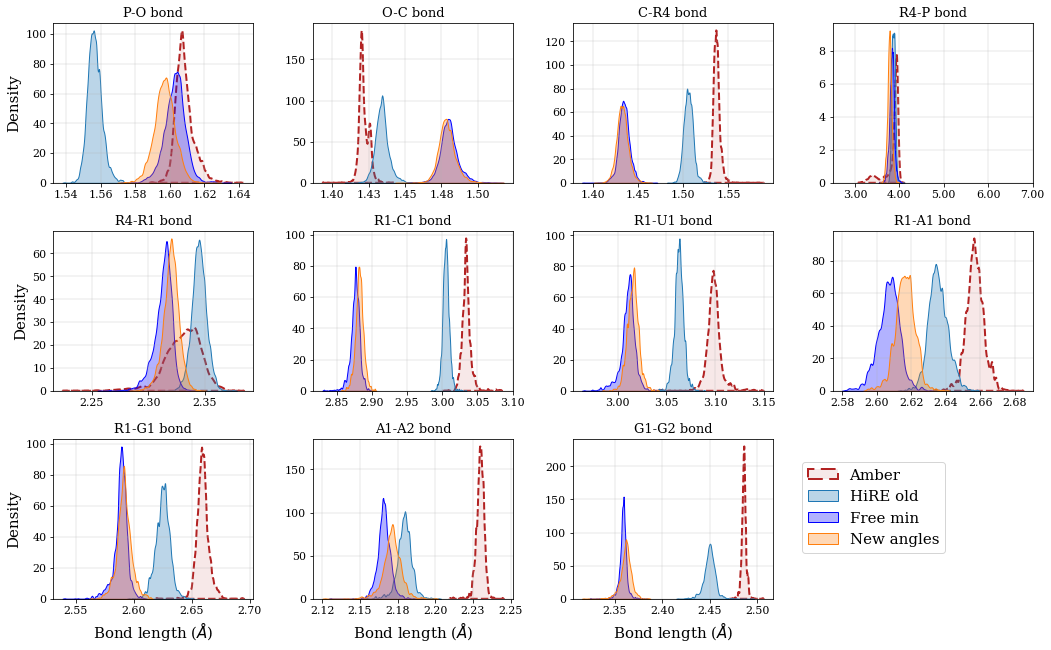

In [5]:
kde_kws = {'shade': True, 'alpha':0.3, 'linewidth': 1, 'bw':0.1}

figure, axes = generate_subplots(len(bonds_true), row_wise=True)
for i, key in enumerate(bonds_true):
    sns.distplot(ax = axes[i], x=np.array(bonds_true[key])*10, hist = False, kde = True,
        kde_kws = {'shade': True, 'alpha':0.1, 'linewidth': 2, 'bw':0.1, 'linestyle':'--'},
                 label='Amber', color='firebrick')
    sns.distplot(ax = axes[i], x=np.array(bonds_old[key])*10, hist = False, kde = True,
        kde_kws = kde_kws, label='HiRE old')
    sns.distplot(ax = axes[i], x=np.array(bonds_free[key])*10, hist = False, kde = True,
        kde_kws = kde_kws, label='Free min', color='b')
    sns.distplot(ax = axes[i], x=np.array(bonds_new[key])*10, hist = False, kde = True,
        kde_kws = kde_kws, label='New angles') #, color='olivedrab')
    axes[i].set_title(key+' bond', fontsize=13)
    axes[i].set_ylabel('')
    axes[i].grid(linewidth=0.3)
    # axes[i].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    axes[i].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    # axes[i].yaxis.set_major_formatter(NullFormatter())
    axes[i].tick_params(axis='both', which='major', labelsize=11)
    # axes[i].tick_params(axis='y', which='major', left=False, right=False)
    axes[i].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axes[10].legend(bbox_to_anchor=(1.9,0.9),fontsize=15)
axes[3].set_xlim(2.5,7)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
axes[8].set_xlabel(r'Bond length ($\AA$)',fontsize=15)
axes[9].set_xlabel(r'Bond length ($\AA$)',fontsize=15)
axes[10].set_xlabel(r'Bond length ($\AA$)',fontsize=15)

axes[0].set_ylabel('Density',fontsize=15)
axes[4].set_ylabel('Density',fontsize=15)
axes[8].set_ylabel('Density',fontsize=15)

plt.savefig('Images/bond_comparison.png',bbox_inches='tight',dpi=100)

In [6]:
angles_true = pickle.load(open('Amber/angles.pkl','rb'))
angles_old = pickle.load(open('HiRE_old/angles.pkl','rb'))
angles_free = pickle.load(open('FreeMin/angles.pkl','rb'))
angles_new = pickle.load(open('FreeMin_newangles/angles.pkl','rb'))

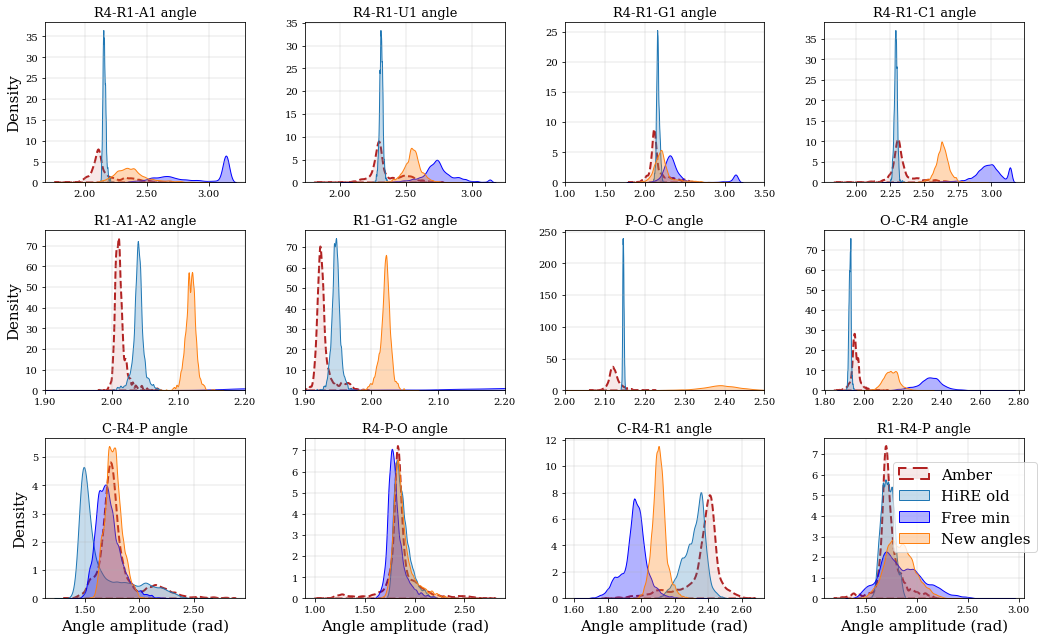

In [7]:
kde_kws = {'shade': True, 'alpha':0.3, 'linewidth': 1, 'bw':0.1}

figure, axes = generate_subplots(len(angles_true), row_wise=True)
for i, key in enumerate(angles_true):
    sns.distplot(ax = axes[i], x=angles_true[key], hist = False, kde = True,
        kde_kws = {'shade': True, 'alpha':0.1, 'linewidth': 2, 'bw':0.1, 'linestyle':'--'},
                 label='Amber', color='firebrick')
    sns.distplot(ax = axes[i], x=angles_old[key], hist = False, kde = True,
         kde_kws = {'shade': True, 'linewidth': 1, 'bw':0.1}, label='HiRE old')
    sns.distplot(ax = axes[i], x=angles_free[key], hist = False, kde = True,
        kde_kws = kde_kws, label='Free min', color='b')
    sns.distplot(ax = axes[i], x=angles_new[key], hist = False, kde = True,
        kde_kws = kde_kws, label='New angles')
    axes[i].set_title(key+' angle', fontsize=13)
    axes[i].set_ylabel('')
    axes[i].grid(linewidth=0.3)
    # axes[i].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    axes[i].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axes[11].legend(bbox_to_anchor=(1.1,0.9),fontsize=15)
axes[2].set_xlim([1,3.5])
axes[4].set_xlim([1.9,2.2])
axes[5].set_xlim([1.9,2.2])
axes[6].set_xlim([2,2.5])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

axes[8].set_xlabel('Angle amplitude (rad)',fontsize=15)
axes[9].set_xlabel('Angle amplitude (rad)',fontsize=15)
axes[10].set_xlabel('Angle amplitude (rad)',fontsize=15)
axes[11].set_xlabel('Angle amplitude (rad)',fontsize=15)

axes[0].set_ylabel('Density',fontsize=15)
axes[4].set_ylabel('Density',fontsize=15)
axes[8].set_ylabel('Density',fontsize=15)

plt.savefig('Images/angles_comparison.png',bbox_inches='tight',dpi=100)

In [9]:
dihedrals_true = pickle.load(open('Amber/dihedrals.pkl','rb'))
dihedrals_old = pickle.load(open('HiRE_old/dihedrals.pkl','rb'))
dihedrals_free = pickle.load(open('FreeMin/dihedrals.pkl','rb'))
dihedrals_new = pickle.load(open('FreeMin_newangles/dihedrals.pkl','rb'))

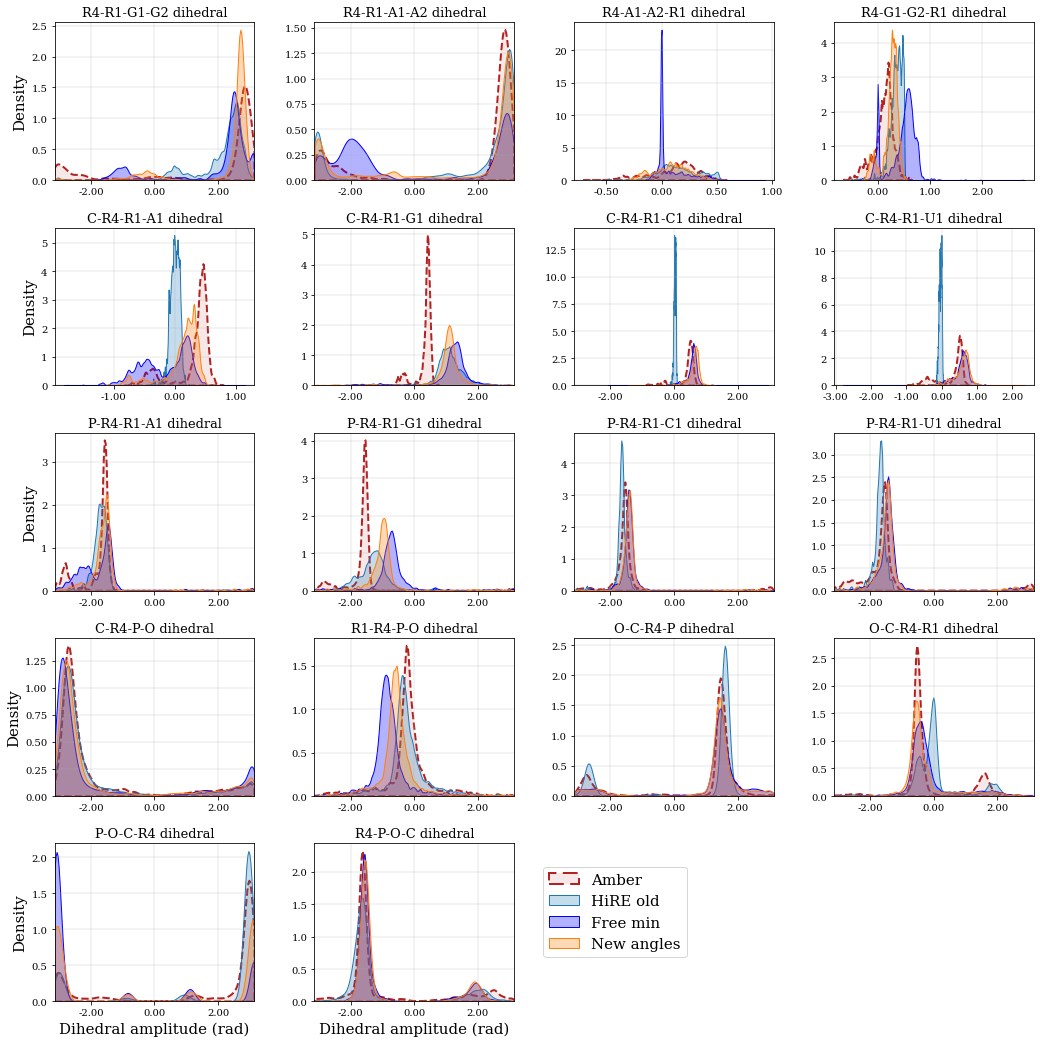

In [10]:
kde_kws = {'shade': True, 'alpha':0.3, 'linewidth': 1, 'clip': (-math.pi, math.pi), 'bw':0.05}

figure, axes = generate_subplots(len(dihedrals_true), row_wise=True)
for i, key in enumerate(dihedrals_true):
    sns.distplot(ax = axes[i], x=dihedrals_true[key], hist=False, kde=True,
        kde_kws = {'shade': True, 'alpha':0.1, 'linewidth': 2, 'clip': (-math.pi, math.pi),
                   'bw':0.05, 'linestyle':'--'}, label='Amber', color='firebrick')
    sns.distplot(ax = axes[i], x=dihedrals_old[key], hist = False, kde = True,
         kde_kws = {'shade': True, 'linewidth': 1, 'clip': (-math.pi, math.pi), 'bw':0.05}, label='HiRE old')
    sns.distplot(ax = axes[i], x=dihedrals_free[key], hist = False, kde = True,
        kde_kws = kde_kws, label='Free min', color='b')
    sns.distplot(ax = axes[i], x=dihedrals_new[key], hist = False, kde = True,
        kde_kws = kde_kws, label='New angles')
    axes[i].set_title(key+' dihedral', fontsize=13)
    axes[i].set_ylabel('')
    axes[i].grid(linewidth=0.3)
    # axes[i].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    axes[i].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    xlim_old = axes[i].get_xlim()
    if xlim_old[0] < -math.pi or xlim_old[1] > math.pi:
        axes[i].set_xlim([-math.pi,math.pi])
axes[17].legend(bbox_to_anchor=(1.9,0.9),fontsize=15)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

axes[16].set_xlabel('Dihedral amplitude (rad)',fontsize=15)
axes[17].set_xlabel('Dihedral amplitude (rad)',fontsize=15)

axes[0].set_ylabel('Density',fontsize=15)
axes[4].set_ylabel('Density',fontsize=15)
axes[8].set_ylabel('Density',fontsize=15)
axes[12].set_ylabel('Density',fontsize=15)
axes[16].set_ylabel('Density',fontsize=15)

plt.savefig('Images/dihedrals_comparison.png',bbox_inches='tight',dpi=100)